In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
df=pd.read_csv('Algerian_forest_fires_cleaned_dataset.csv')

In [7]:
df.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,1,6,2012,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,0.0
1,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,not fire,0.0
2,3,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,0.0
3,4,6,2012,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,not fire,0.0
4,5,6,2012,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,not fire,0.0


In [9]:
df.columns

Index(['day', 'month', 'year', 'Temperature', 'RH', 'Ws', 'Rain', 'FFMC',
       'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes', 'Region'],
      dtype='object')

In [11]:
##drop month,day and yyear
df.drop(['day','month','year'],axis=1,inplace=True)

In [13]:
df.head()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,0.0
1,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,not fire,0.0
2,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,0.0
3,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,not fire,0.0
4,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,not fire,0.0


In [15]:
df['Classes'].value_counts()

Classes
not fire       60
fire           53
fire            4
fire            2
not fire        2
not fire        1
Name: count, dtype: int64

In [17]:
## Encoding
df['Classes']=np.where(df['Classes'].str.contains("not fire"),0,1)

In [19]:
df.tail()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
117,31,54,11,0.0,82.0,6.0,16.3,2.5,6.2,1.7,0,0.0
118,31,66,11,0.0,85.7,8.3,24.9,4.0,9.0,4.1,1,0.0
119,32,47,14,0.7,77.5,7.1,8.8,1.8,6.8,0.9,0,0.0
120,26,80,16,1.8,47.4,2.9,7.7,0.3,3.0,0.1,0,0.0
121,25,78,14,1.4,45.0,1.9,7.5,0.2,2.4,0.1,0,0.0


In [21]:
df['Classes'].value_counts()

Classes
0    63
1    59
Name: count, dtype: int64

In [23]:
## Independent And dependent features
X=df.drop('FWI',axis=1)
y=df['FWI']

In [25]:
X.head()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,Classes,Region
0,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0,0.0
1,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0,0.0
2,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0,0.0
3,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0,0.0
4,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0,0.0


In [27]:
y

0      0.5
1      0.4
2      0.1
3      0.0
4      0.5
      ... 
117    1.7
118    4.1
119    0.9
120    0.1
121    0.1
Name: FWI, Length: 122, dtype: float64

In [29]:
#Train Test Split
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=42)

In [31]:
X_train.shape,X_test.shape

((91, 11), (31, 11))

In [33]:
## Feature Selection based on correlaltion
X_train.corr()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,Classes,Region
Temperature,1.000000,-0.680264,-0.135288,-0.436188,0.750207,0.545003,0.533488,0.702282,0.544498,0.540134,NaN
RH,-0.680264,1.000000,0.229070,0.320706,-0.666734,-0.324957,-0.306356,-0.580488,-0.318486,-0.378169,NaN
Ws,-0.135288,0.229070,1.000000,0.364243,-0.139364,0.081886,0.143241,0.029944,0.106211,-0.064097,NaN
Rain,-0.436188,0.320706,0.364243,1.000000,-0.527692,-0.261946,-0.299346,-0.377590,-0.274212,-0.360694,NaN
FFMC,0.750207,-0.666734,-0.139364,-0.527692,1.000000,0.623398,0.606266,0.811590,0.618525,0.775019,NaN
DMC,0.545003,-0.324957,0.081886,-0.261946,0.623398,1.000000,0.973720,0.733634,0.996387,0.622460,NaN
DC,0.533488,-0.306356,0.143241,-0.299346,0.606266,0.973720,1.000000,0.730361,0.988647,0.610661,NaN
ISI,0.702282,-0.580488,0.029944,-0.377590,0.811590,0.733634,0.730361,1.000000,0.736173,0.841128,NaN
BUI,0.544498,-0.318486,0.106211,-0.274212,0.618525,0.996387,0.988647,0.736173,1.000000,0.620282,NaN
Classes,0.540134,-0.378169,-0.064097,-0.360694,0.775019,0.622460,0.610661,0.841128,0.620282,1.000000,NaN


<Axes: >

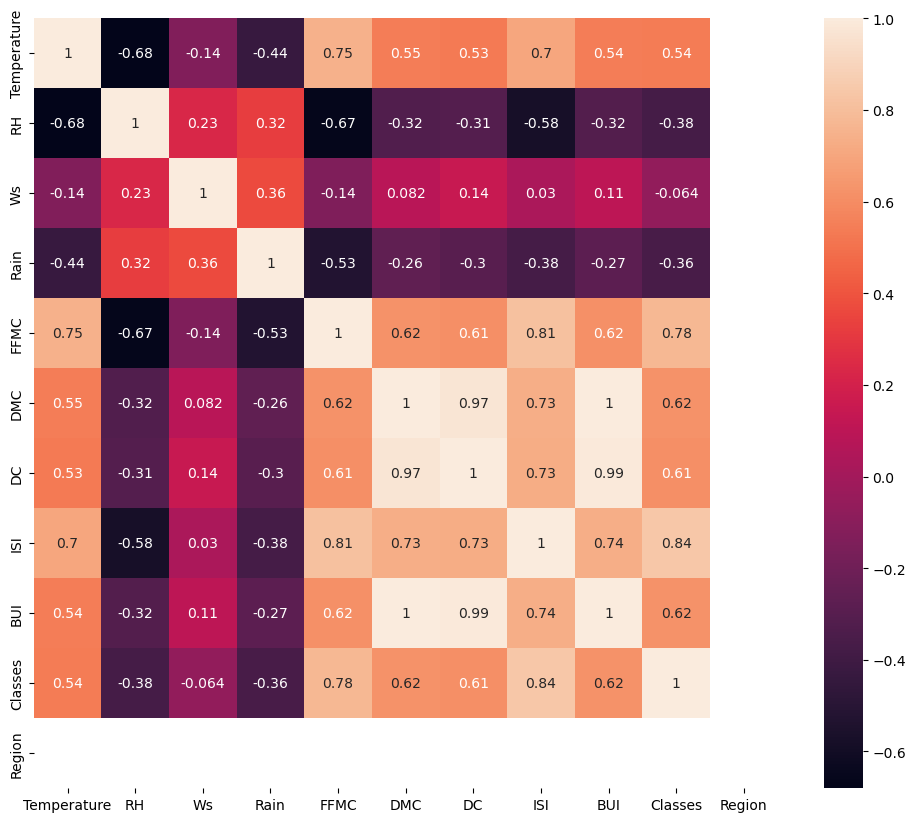

In [35]:
## Check for multicollinearity
plt.figure(figsize=(12,10))
corr=X_train.corr()
sns.heatmap(corr,annot=True)

In [37]:
X_train.corr()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,Classes,Region
Temperature,1.000000,-0.680264,-0.135288,-0.436188,0.750207,0.545003,0.533488,0.702282,0.544498,0.540134,NaN
RH,-0.680264,1.000000,0.229070,0.320706,-0.666734,-0.324957,-0.306356,-0.580488,-0.318486,-0.378169,NaN
Ws,-0.135288,0.229070,1.000000,0.364243,-0.139364,0.081886,0.143241,0.029944,0.106211,-0.064097,NaN
Rain,-0.436188,0.320706,0.364243,1.000000,-0.527692,-0.261946,-0.299346,-0.377590,-0.274212,-0.360694,NaN
FFMC,0.750207,-0.666734,-0.139364,-0.527692,1.000000,0.623398,0.606266,0.811590,0.618525,0.775019,NaN
DMC,0.545003,-0.324957,0.081886,-0.261946,0.623398,1.000000,0.973720,0.733634,0.996387,0.622460,NaN
DC,0.533488,-0.306356,0.143241,-0.299346,0.606266,0.973720,1.000000,0.730361,0.988647,0.610661,NaN
ISI,0.702282,-0.580488,0.029944,-0.377590,0.811590,0.733634,0.730361,1.000000,0.736173,0.841128,NaN
BUI,0.544498,-0.318486,0.106211,-0.274212,0.618525,0.996387,0.988647,0.736173,1.000000,0.620282,NaN
Classes,0.540134,-0.378169,-0.064097,-0.360694,0.775019,0.622460,0.610661,0.841128,0.620282,1.000000,NaN


In [39]:
def correlation(dataset, threshold):
    col_corr = set()
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold:
                colname = corr_matrix.columns[i]
                col_corr.add(colname)
    return col_corr

In [41]:
## threshold--Domain expertise
corr_features=correlation(X_train,0.85)

In [43]:
corr_features

{'BUI', 'DC'}

In [45]:
## drop features when correlation is more than 0.85
X_train.drop(corr_features,axis=1,inplace=True)
X_test.drop(corr_features,axis=1,inplace=True)
X_train.shape,X_test.shape

((91, 9), (31, 9))

## Feature Scaling Or Standardization


In [48]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
X_train_scaled=scaler.fit_transform(X_train)
X_test_scaled=scaler.transform(X_test)

In [50]:
X_train_scaled

array([[-0.73323558,  1.90224414, -1.01880763, -0.06007241, -2.44466934,
        -0.97491305, -1.26992877, -1.05654109,  0.        ],
       [ 1.17317692, -1.58553965, -1.01880763, -0.2232542 ,  0.40445483,
         0.2313547 , -0.42664566, -1.05654109,  0.        ],
       [ 0.21997067, -0.57591803,  0.80622178, -0.30484509,  0.4107582 ,
        -0.41083101, -0.15679506,  0.94648472,  0.        ],
       [-1.68644182,  1.16797387,  1.90123943,  2.02049531, -1.65674784,
        -0.86209664, -1.13500348, -1.05654109,  0.        ],
       [-1.05097099,  1.07619008,  1.90123943,  6.50799431, -1.41091632,
        -0.36744009, -1.06754083, -1.05654109,  0.        ],
       [ 1.49091234, -1.40197209,  0.07621002, -0.34564053,  0.92133134,
         2.14055545,  2.238129  ,  0.94648472,  0.        ],
       [-0.73323558, -0.02521533,  1.17122767,  0.06231392, -0.94446679,
        -0.90548757, -0.8988842 , -1.05654109,  0.        ],
       [ 1.80864775, -1.49375587,  0.80622178, -0.34564053,  0

## Box Plots To understand Effect Of Standard Scaler

Text(0.5, 1.0, 'X_train After Scaling')

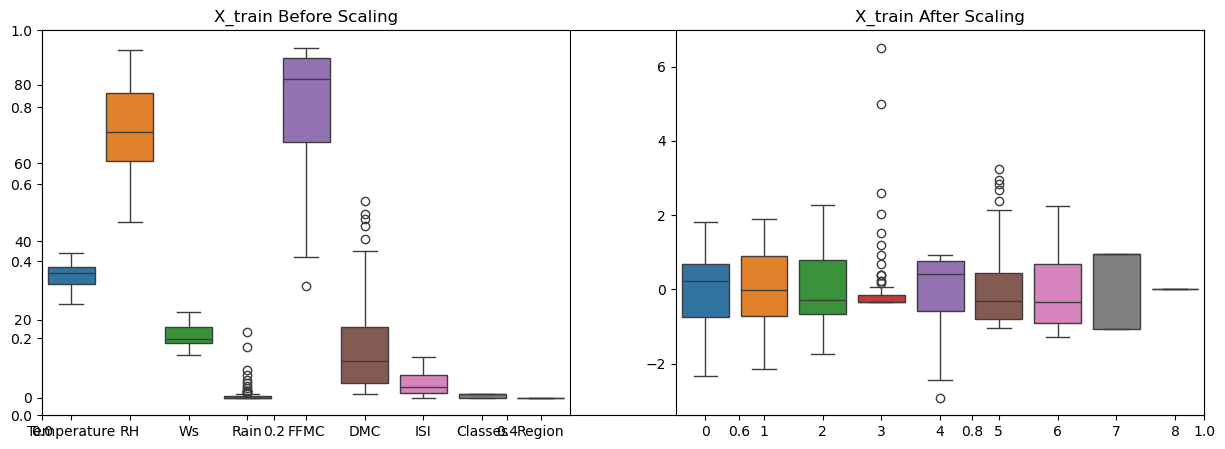

In [55]:
plt.subplots(figsize=(15, 5))
plt.subplot(1, 2, 1)
sns.boxplot(data=X_train)
plt.title('X_train Before Scaling')
plt.subplot(1, 2, 2)
sns.boxplot(data=X_train_scaled)
plt.title('X_train After Scaling')

## Linear Regression Model

In [59]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
linreg=LinearRegression()
linreg.fit(X_train_scaled,y_train)
y_pred=linreg.predict(X_test_scaled)
mae=mean_absolute_error(y_test,y_pred)
score=r2_score(y_test,y_pred)
print("Mean absolute error", mae)
print("R2 Score", score)

Mean absolute error 0.4602284749198746
R2 Score 0.9912862880727432


## Lasso Regression

In [64]:
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
lasso=Lasso()
lasso.fit(X_train_scaled,y_train)
y_pred=lasso.predict(X_test_scaled)
mae=mean_absolute_error(y_test,y_pred)
score=r2_score(y_test,y_pred)
print("Mean absolute error", mae)
print("R2 Score", score)

Mean absolute error 1.1834975881342824
R2 Score 0.9341611690423185


## Ridge Regression model

In [67]:
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
ridge=Ridge()
ridge.fit(X_train_scaled,y_train)
y_pred=ridge.predict(X_test_scaled)
mae=mean_absolute_error(y_test,y_pred)
score=r2_score(y_test,y_pred)
print("Mean absolute error", mae)
print("R2 Score", score)

Mean absolute error 0.44688071224751336
R2 Score 0.9909212889012053


## Elasticnet Regression

In [70]:
from sklearn.linear_model import ElasticNet
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
elastic=ElasticNet()
elastic.fit(X_train_scaled,y_train)
y_pred=elastic.predict(X_test_scaled)
mae=mean_absolute_error(y_test,y_pred)
score=r2_score(y_test,y_pred)
print("Mean absolute error", mae)
print("R2 Score", score)

Mean absolute error 1.64460863806815
R2 Score 0.8616482835599337


In [72]:
import pickle
pickle.dump(scaler,open('scaler.pkl','wb'))
pickle.dump(ridge,open('ridge.pkl','wb'))